In [29]:
# Imports 
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.objectives import MSE, MAE
from keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [30]:
# Get data
df1 = pandas.read_csv('Data_exploration.csv', low_memory=False, nrows = 1457)
df2 = pandas.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv', low_memory=False, nrows = 1457)
df3 = df2['total_cases']
df = df1.join(df3)

# Drop NaN
df.dropna(inplace=True)

# Select only relevant features (correlation to label > 0.1)
df_clean_relevant = df[['city','year', 'weekofyear', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'total_cases']]

# Input output split
x = df_clean_relevant.drop(['city','year', 'weekofyear', 'total_cases'], axis=1)
y = df_clean_relevant['total_cases']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.1,random_state=1)

# Scale
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Quick look
X_train.shape

(1079, 12)

In [31]:
# Initialize
model = Sequential([
  Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1),
])

# Compile
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.002))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train and log
train_log = model.fit(X_train, y_train.values, batch_size=256, epochs=200, validation_split=0.1, verbose=2, callbacks=[early_stopping])

Train on 971 samples, validate on 108 samples
Epoch 1/200
 - 0s - loss: 21.0022 - val_loss: 20.7049
Epoch 2/200
 - 0s - loss: 19.0878 - val_loss: 18.2588
Epoch 3/200
 - 0s - loss: 17.0471 - val_loss: 18.1226
Epoch 4/200
 - 0s - loss: 17.4549 - val_loss: 18.1158
Epoch 5/200
 - 0s - loss: 16.8385 - val_loss: 17.2414
Epoch 6/200
 - 0s - loss: 16.4453 - val_loss: 17.2251
Epoch 7/200
 - 0s - loss: 16.3996 - val_loss: 16.8123
Epoch 8/200
 - 0s - loss: 15.9104 - val_loss: 16.3366
Epoch 9/200
 - 0s - loss: 15.6590 - val_loss: 16.0013
Epoch 10/200
 - 0s - loss: 15.3204 - val_loss: 15.4482
Epoch 11/200
 - 0s - loss: 15.0519 - val_loss: 15.1652
Epoch 12/200
 - 0s - loss: 14.8327 - val_loss: 14.9615
Epoch 13/200
 - 0s - loss: 14.8541 - val_loss: 14.8890
Epoch 14/200
 - 0s - loss: 14.8491 - val_loss: 14.9257
Epoch 15/200
 - 0s - loss: 14.8620 - val_loss: 14.8483
Epoch 16/200
 - 0s - loss: 14.8282 - val_loss: 14.9049
Epoch 17/200
 - 0s - loss: 14.8188 - val_loss: 14.9202
Epoch 18/200
 - 0s - loss: 1

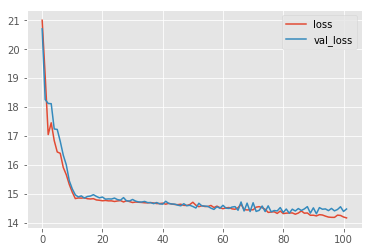

In [32]:
# Plot

import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [33]:
# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)

# Result
print('NNW Performance on the test set: MAE = %0.4f' % mae)

NNW Performance on the test set: MAE = 13.5878
